In [0]:
%pip install pyg_lib torch_scatter torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.3.1+cpu.html
%restart_python

Looking in links: https://data.pyg.org/whl/torch-2.3.1+cpu.html
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcpu/pyg_lib-0.4.0%2Bpt23cpu-cp311-cp311-linux_x86_64.whl (1.3 MB)
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcpu/torch_scatter-2.1.2%2Bpt23cpu-cp311-cp311-linux_x86_64.whl (515 kB)
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcpu/torch_cluster-1.6.3%2Bpt23cpu-cp311-cp311-linux_x86_64.whl (785 kB)
  Using cached https://data.pyg.org/whl/torch-2.3.0%2Bcpu/torch_spline_conv-1.2.2%2Bpt23cpu-cp311-cp311-linux_x86_64.whl (217 kB)
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
import torch_geometric
print(torch_geometric.__version__)

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

In [0]:
import sparknlp
spark = sparknlp.start()
spark

In [0]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import col

# File location and type
file_location_1 = "/FileStore/tables/horef/job_listings.parquet"
file_location_2 = "/FileStore/tables/horef/glassdoor_4k_git.parquet"
file_location_3 = "/FileStore/tables/horef/linkedin_tech_82k_git.parquet"
file_location_4 = "/FileStore/tables/horef/linkedin_124k_kaggle.parquet"
file_type = "parquet"

# The applied options are for CSV files. For other file types, these will be ignored.
custom_data_1 = spark.read.format(file_type).load(file_location_1)
custom_data_1 = custom_data_1.drop('__index_level_0__').drop('url')
custom_data_1 = custom_data_1.filter(
    (col("title").isNotNull()) &
    (col("company_name").isNotNull()) &
    (col("description").isNotNull())
)
# for the smaller sample, comment if more resource are available
custom_data_1 = custom_data_1.sample(False, 700 / custom_data_1.count(), 3)

custom_data_2 = spark.read.format(file_type).load(file_location_2)
custom_data_2 = custom_data_2.withColumnsRenamed({'Job Title': 'title', 'Job Description': 'description', 'Company Name': 'company_name', 'Location': 'location'}).select('company_name', 'title', 'location', 'description').withColumn('salary', lit(None)).withColumn('type', lit(None))
custom_data_2 = custom_data_2.filter(
    (col("title").isNotNull()) &
    (col("company_name").isNotNull()) &
    (col("description").isNotNull())
)

custom_data_3 = spark.read.format(file_type).load(file_location_3)
custom_data_3 = custom_data_3.withColumnsRenamed({'company': 'company_name', 'Employment type': 'type'}).select('company_name', 'title', 'location', 'salary', 'type', 'description')
custom_data_3 = custom_data_3.filter(
    (col("title").isNotNull()) &
    (col("company_name").isNotNull()) &
    (col("description").isNotNull())
)
# for the smaller sample, comment if more resource are available
custom_data_3 = custom_data_3.sample(False, 300 / custom_data_3.count(), 3)

custom_data_4 = spark.read.format(file_type).load(file_location_4)
custom_data_4 = custom_data_4.withColumnsRenamed({'normalized_salary': 'salary', 'formatted_work_type': 'type'}).select('company_name', 'title', 'location', 'salary', 'type', 'description')
custom_data_4 = custom_data_4.filter(
    (col("title").isNotNull()) & (col("title") != "") &
    (col("company_name").isNotNull()) & (col("company_name") != "") &
    (col("description").isNotNull()) & (col("description") != "")
)

In [0]:
print(custom_data_1.count())
display(custom_data_1.limit(10))

702


company_name title location salary type description Self-employed U.S. Sales Representative (self-employed) Unknown null Freelance Do you excel at spotting opportunities and enjoy being the bridge between businesses and their next big step? At glocled, we’re experts in guiding U.S. companies through the exciting journey of expanding to Germany – Europe’s economy. We’re growing fast and looking for a Sales Representative who’s passionate about connecting ambitious businesses with the right opportunities. This isn’t your typical sales role – it’s about building meaningful relationships, uncovering growth opportunities, and representing a company that’s transforming how businesses approach international expansion. With the freedom of freelance work and the backing of an internationally-focused team, you should have the tools and flexibility to succeed on your terms. Tasks 

Spot the Right Opportunities: Identify US-based companies that are interested in expanding to Germany and introduce them to glocled’s tailored services.Showcase Our Value: Present glocled as the go-to partner for seamless market entry into Germany, highlighting the benefits of our hands-on support.Spread the Word: Represent glocled at networking events/ industry meetups, building awareness of our services within the US business community. Requirements 

Relationship Builder: You’re great at starting conversations and creating lasting connections.Proactive Mindset: You’re driven, self-motivated, and excited about working independently.Interest in International Business: A passion for helping companies expand internationally is a bonus, but not required. We take care of the expansion services.Flexible and Open-Minded: Whether you’re experienced in sales or just have a natural talent for connecting with people, we’d love to hear from you.US Based: You’ll be working with US businesses, so being in the US is essential. Benefits 

Huge Earnings Potential: Our commission-based model means your success directly benefits you.Freedom to Succeed: Enjoy the independence of freelance work while being supported by a team that’s invested in your growth.Exciting Opportunities: Represent a company that’s transforming how US businesses access one of Europe’s most promising markets.A Collaborative Environment: We’re a small, ambitious team that celebrates wins and grows together. Accenture PLM Change Analyst- Teamcenter Mountain View, CA null Full-time The PLM Change Management Analyst will have the following responsibilities:

Read product datasheets, identify manufacturer part numbers, create descriptions and part numbersCreate Bills of Materials (BOM)Execute Engineering Change Orders (ECO’s) and Manufacturing Change Orders (MCO’s) in Agile PLM system based on inputs from change managers and client stakeholdersConduct change impact analysisReporting on SLA and metrics

 Job Requirement: This role is located in San Jose, CA or Austin, TX. TX residents will have a work schedule to cover office hours in PST time. 

Basic Qualifications: 

Minimum of 1 year of experience in Engineering Change ManagementMinimum 1 year of experience using Teamcenter PLM

 Preferred Qualifications 

Experience working in Hi Tech IndustriesExperience of working with Contract Manufacturers, Servers and Networking Equipment Component EngineeringExposure to Engineering Supply Chain and Manufacturing functions

 Professional Skills Requirements: 

Ability to read Engineering Drawings Spec Sheets to create part descriptions and identify manufacturing part numbersExperience working with Bill of Materials, ECR’s, ECN’s, ECO’s, MCO’s

Compensation at Accenture varies depending on a wide array of factors, which may include but are not limited to the specific office location, role, skill set, and level of experience. As required by local law, Accenture provides a reasonable range of compensation for roles that may be hired in California, Colorado, District of Columbia, Illinois, Maryland, Minnesota, New York or

In [0]:
print(custom_data_2.count())
display(custom_data_2.limit(10))

150


company_name title location description salary type Amazon
3.9 Big Data & Analytics Consultant Jakarta Are you passionate about analytics? Would you like to help customers become more data driven to achieve their business goals? Do you want to learn the very latest in cloud web services technologies and apply them to some of the most interesting analytics workloads in the world? Are you skilled at helping customers and partners to address their Big Data and Analytics projects using cloud computing architectures?
At Amazon Web Services (AWS), were hiring technical Big Data and Analytics consultants to help our customers & partners develop technical expertise and capacity, and to work with our partners on key customer engagements.

Within the diverse Professional Services team, this role specializes in a variety of Big Data and Analytics aspects using cloud web services in large scale computing environments. Our Big Data and Analytics consultants deliver architecture guidance, lead projects, conduct customer workshops and implement complex data analytics workloads with our customers and partners.
Responsibilities include:
· Expertise - Collaborate with AWS field sales, pre-sales, training and support teams to help customers and partners learn and use AWS services such as Amazon Elastic Compute Cloud (EC2), Amazon Simple Storage Service (S3), Amazon Elastic Map Reduce (EMR), Amazon SageMaker (development of advanced analytics and Machine Learning pipelines), AWS Glue (serverless Apache Spark workloads), AWS Lambda (serverless computing), etc.

· Solutions - Define and deliver on-site technical engagements with partners and customers. This includes participating in pre-sales meetings & visits, understanding customer Big Data and Analytics requirements, and proposing and delivering packaged offerings, as well as delivering custom solution engagements.

· Delivery - Engagements include short on-site projects proving the use of AWS services to support new distributed computing solutions that often span private cloud and public cloud services. Engagements will include migration of existing applications and development of new applications using AWS cloud services.

· Insights - Work with AWS engineering, support and business teams to convey partner and customer feedback as input to AWS technology roadmaps.

Basic Qualifications

· 1+ years of experience in cloud
· 10+ years of experience with direct customer interaction
· 5+ years of experience with any of the following technologies: Databases (SQL/NoSQL, MongoDB, Cassandra, MariaDB, PostgreSQL), Big Data open source tools (Hadoop, Spark), Big Data proprietary tools (Hortonworks, Cloudera) programing experience (Java, Python, R, Julia, SQL) BI tools (Tableau, Power BI, Spotfire, Microstrategy, Cognos, etc).
· Business level command of English language, reading, writing and speaking.
· BS level degree required or equivalent
· Travel to customer locations may be required to support pre-sales and delivery of professional services, as needed.



Preferred Qualifications

· Current, large scale project implementation experience required.
· Strong verbal and written communications skills and ability to lead effectively across organizations.
· Project experience with key vertical markets such as Financial Sector, Telecom, and Utilities.
· Ability to think strategically about business, product, and technical challenges.
· Technical and analytical skills, possessing 7+ years of IT implementation/consulting experience.
· Implementation of AWS services in a distributed environments with large data pipelines using technologies such as Microsoft, IBM, Oracle, HP, SAP etc.
· BS level degree in computer science, business or math background preferred.
· Ability to understand and educate customers on cloud computing technologies and workload transition challenges.
Amazon is committed to a diverse and inclusive workplace. Amazon is an equal opportunity employer, and does not discriminate on the basis of

In [0]:
print(custom_data_3.count())
display(custom_data_3.limit(10))

285


company_name title location salary type description Rapid7 Senior Software Engineer - Frontend Boston, MA null Full-time Senior Software Engineer - Frontend Rapid7 Mission Security operations teams are underserved. Impactful outcomes are few and far between and cost more than expected. Hundreds of security vendors build solutions for 1% of companies who have 10x more of everything, yet still get breached. The security gap grows wider daily; security operations teams deserve better. At Rapid7, we can close the gap by serving customers intentionally. We choose to believe: The status quo maintains the gap, so we challenge convention Every company is unique - we deliver extensible, adaptable solutions enabling the outcomes matching the customer's needs There is strength in numbers, so we provide tools to security, IT, compliance and business partners to make an impact together Security needs champions, so we advocate for security within corporations, governments and beyond Attackers are relentless, so our job is never done Role If you are looking for an opportunity to drive tremendous impact in a growing market through an emerging Security, Orchestration, Automation and Response product called InsightConnect , help our customers achieve success in increasing their operational efficiency through automation, and grow an integral part of Rapid7's security operations platform and overall expansion strategy, this could be the role for you! You'll be involved in building, maintaining, and releasing our various backend services, as well as helping to shape and define our standards and best practices as they evolve within our team, and in our company. You'll work collaboratively with others to enable our customers to automate their security practices and get more done with less time. Our product has an emphasis on a high quality user experience, as our visual builder, configuration components, and overall experience are tailored to taking complex processes and distilling them into simple and straightforward workflows for users. You'll also be heavily involved in the design and planning work of upcoming features, as we expect our engineers to be first class stakeholders in all parts of the development process. You'll have the benefit of working with an embedded UX team and the Product Owner, who work deeply with our product to understand the customers needs and craft features that enable them to orchestrate their security processes simply and easily. Additionally, you'll have the chance to mentor and be mentored by a talented group of engineers, both on your team and across the company. Successful candidates aren't just good at writing code, but have a demonstrated focus on solving customer problems. You should love being challenged by your work, with a desire to ship and iterate on features, as well as an emphasis on collaboration, communication, and growth. Our entire team (Dev, UX, Product, Support, Sales) works together closely to ensure the success of our product, and we're looking for someone who revels in exposure to the entire process of how software is built, shipped, sold, and supported. Additionally, being willing to dive into the shallow end of our backend API services will be a major benefit, even when your day to day is focused on our React components. We value attitude and willingness to learn over ego and experience, and want someone who is looking to grow with the team as we continue to grow our product. Our Stack Go React 16 Postgres Redis Docker + Kubernetes Terraform AWS You need to be… Focused on communication and collaboration as first-class skills. Focused on shipping solutions to problems, not just code. Experienced and confident in your ability to produce working features, cohesive designs, and thought-through bug fixes. Familiar with making software development decisions from conception and design to implementation and shipping in production Someone with a “grab a shovel” attitude, where you're excited to dig in a

In [0]:
print(custom_data_4.count())
display(custom_data_4.limit(10))

122124


company_name title location salary type description Corcoran Sawyer Smith Marketing Coordinator Princeton, NJ 38480.0 Full-time Job descriptionA leading real estate firm in New Jersey is seeking an administrative Marketing Coordinator with some experience in graphic design. You will be working closely with our fun, kind, ambitious members of the sales team and our dynamic executive team on a daily basis. This is an opportunity to be part of a fast-growing, highly respected real estate brokerage with a reputation for exceptional marketing and extraordinary culture of cooperation and inclusion.Who you are:You must be a well-organized, creative, proactive, positive, and most importantly, kind-hearted person. Please, be responsible, respectful, and cool-under-pressure. Please, be proficient in Adobe Creative Cloud (Indesign, Illustrator, Photoshop) and Microsoft Office Suite. Above all, have fantastic taste and be a good-hearted, fun-loving person who loves working with people and is eager to learn.Role:Our office is a fast-paced environment. You’ll work directly with a Marketing team and communicate daily with other core staff and our large team of agents. This description is a brief overview, but your skills and interests will be considered in what you work on and as the role evolves over time.Agent Assistance- Receive & Organize Marketing Requests from Agents- Track Tasks & Communicate with Marketing team & Agents on Status- Prepare print materials and signs for open houses- Submit Orders to Printers & Communicate & Track DeadlinesGraphic Design & Branding- Managing brand strategy and messaging through website, social media, videos, online advertising, print placement and events- Receive, organize, and prioritize marketing requests from agents- Fulfill agent design requests including postcards, signs, email marketing and property brochures using pre-existing templates and creating custom designs- Maintain brand assets and generic filesEvents & Community- Plan and execute events and promotions- Manage Contacts & Vendors for Event Planning & SponsorshipsOur company is committed to creating a diverse environment and is proud to be an equal opportunity employer. All qualified applicants will receive consideration for employment without regard to race, color, religion, gender, gender identity or expression, sexual orientation, national origin, genetics, disability, age, or veteran status.Job Type: Full-time
Pay: $18-20/hour
Expected hours: 35 – 45 per week
Benefits:Paid time offSchedule:8 hour shiftMonday to FridayExperience:Marketing: 1 year (Preferred)Graphic design: 2 years (Preferred)Work Location: In person
 The National Exemplar Assitant Restaurant Manager Cincinnati, OH 55000.0 Full-time The National Exemplar is accepting applications for an Assistant Restaurant Manager.
We offer highly competitive wages, healthcare, paid time off, complimentary dining privileges and bonus opportunities. 
We are a serious, professional, long-standing neighborhood restaurant with over 41 years of service. If you are looking for a long-term fit with a best in class organization then you should apply now. 
Please send a resumes to pardom@nationalexemplar.com. o Abrams Fensterman, LLP Senior Elder Law / Trusts and Estates Associate Attorney New Hyde Park, NY 157500.0 Full-time Senior Associate Attorney - Elder Law / Trusts and Estates Our legal team is committed to providing each client with quality counsel, innovative solutions, and personalized service. Founded in 2000, the firm offers the legal expertise of its 115+ attorneys, who have accumulated experience and problem-solving skills over decades of practice.
We are a prominent Lake Success Law Firm seeking an associate attorney for its growing Elder Law and Estate Planning practice. The successful candidate will be a self-motivated, detail-oriented team member with strong communication skills and a desire to grow their practice. Experience with Estate Planning, Administration, and Litigation

In [0]:
from pyspark.sql.functions import lit
from pyspark.sql.functions import col
from functools import reduce

custom_data_frames = [custom_data_1, custom_data_2, custom_data_3, custom_data_4]
custom_data = reduce(lambda df1, df2: df1.union(df2.select([lit(None).alias(col) for col in df1.columns])), custom_data_frames)
custom_data = custom_data.drop('salary').drop('type')

In [0]:
# the same as the last cell, but only for the smaller sample. Use previous cell if more resource are available
from pyspark.sql.functions import lit
from pyspark.sql.functions import col
from functools import reduce

custom_data_frames = [custom_data_1, custom_data_3]
custom_data = reduce(lambda df1, df2: df1.union(df2.select([lit(None).alias(col) for col in df1.columns])), custom_data_frames)
custom_data = custom_data.drop('salary').drop('type')

In [0]:
entry_count = custom_data.count()
display(entry_count)

987

In [0]:
from pyspark.sql.functions import concat_ws

custom_data = custom_data.withColumn(
    "pre_enc", 
    concat_ws(" ", "title", "company_name", "location", "description")
)

In [0]:
# only use this if previously all data was combined
custom_data = custom_data.sample(False, 5000 / custom_data.count(), 3)

In [0]:
print(custom_data.count())

5064


In [0]:
display(custom_data.dtypes)

_1 _2 company_name string title string location string description string pre_enc string

In [0]:
from pyspark.sql.functions import split, size, avg

average_words = custom_data.withColumn("word_count", size(split(custom_data["pre_enc"], " "))) \
                               .select(avg("word_count").alias("average_word_count"))

display(average_words)

average_word_count 509.9409300377042

## Embedding the positions

In [0]:
from sparknlp.annotator import *
from sparknlp.base.embeddings_finisher import EmbeddingsFinisher
from pyspark.ml import Pipeline

custom_data_emb = custom_data

custom_data_cols = ['pre_enc']

for col in custom_data_cols:
    custom_data_emb = custom_data_emb.withColumn(col, custom_data_emb[col].cast('string'))

assemblers = [DocumentAssembler().setInputCol(col).setOutputCol(f'{col}_ass') for col in custom_data_cols]
tokenizers = [Tokenizer().setInputCols(f'{col}_ass').setOutputCol(f'{col}_token') for col in custom_data_cols]
embeddings = [BertEmbeddings.pretrained("bert_embeddings_bert_large_uncased_whole_word_masking", "en").setMaxSentenceLength(512).setDimension(1200).setInputCols([f'{col}_ass', f'{col}_token']).setOutputCol(f'{col}_emb') for col in custom_data_cols]
finishers = [EmbeddingsFinisher().setInputCols(f"{col}_emb").setOutputCols(f"{col}_vec").setOutputAsVector(True).setCleanAnnotations(False) for col in custom_data_cols]

stages = []
stages.extend(assemblers)
stages.extend(tokenizers)
stages.extend(embeddings)
stages.extend(finishers)

pipeline = Pipeline(stages=stages)

custom_data_emb = pipeline.fit(custom_data_emb).transform(custom_data_emb)
for col in custom_data_cols:
    custom_data_emb = custom_data_emb.drop(f'{col}_ass', f'{col}_token', f'{col}_emb')

bert_embeddings_bert_large_uncased_whole_word_masking download started this may take some time.
Approximate size to download 1.2 GB
[OK!]


In [0]:
display(custom_data_emb.dtypes)

_1 _2 company_name string title string location string description string pre_enc string pre_enc_vec array

In [0]:
from pyspark.sql.functions import array, flatten

custom_data_emb = custom_data_emb.withColumnRenamed('pre_enc_vec', 'embedding').drop('pre_enc')

In [0]:
display(custom_data_emb.dtypes)

_1 _2 company_name string title string location string description string embedding array

In [0]:
custom_data_emb.select('embedding').show(1)

+--------------------+
|           embedding|
+--------------------+
|[[0.6192565560340...|
+--------------------+
only showing top 1 row



In [0]:
import numpy as np
from pyspark.sql.functions import col, udf
from pyspark.sql.types import ArrayType, DoubleType

# defining a udf to 
def mean_emb(embs):
    if not embs:
        return None
    mean_vec = np.mean(embs, axis=0)
    return mean_vec.tolist()

mean_emb_udf = udf(mean_emb, ArrayType(DoubleType()))

custom_data_emb_avg = custom_data_emb.withColumn('embedding', mean_emb_udf(col('embedding')))

In [0]:
custom_data_emb_avg.select('embedding').show(1)

+--------------------+
|           embedding|
+--------------------+
|[0.54620986604604...|
+--------------------+
only showing top 1 row



In [0]:
random_job_pos_df = custom_data_emb_avg.toPandas()

## Embedding the profiles

In [0]:
profiles = spark.read.parquet('/dbfs/linkedin_people_train_data')

In [0]:
display(profiles.dtypes)

_1 _2 about string avatar string certifications array > city string country_code string current_company struct current_company:company_id string current_company:name string education array > educations_details string experience array >,start_date:string,subtitle:string,subtitleURL:string,title:string,url:string>> followers bigint following bigint groups array id string languages array > name string people_also_viewed array > position string posts array > recommendations array recommendations_count bigint timestamp string url string volunteer_experience array > сourses array >

In [0]:
profiles_count = profiles.count()
profiles_count

2768313

In [0]:
from pyspark.sql.functions import expr, col, size

profiles_filtered = profiles.filter(size("experience") > 0)
profiles_filtered = profiles_filtered.filter(col('about').isNotNull())
profiles_filtered = profiles_filtered.filter(expr("exists(experience, x -> x.description IS NOT NULL)"))
profiles_filtered = profiles_filtered.sample(False, 250 / profiles_filtered.count(), 3)

In [0]:
display(profiles_filtered.count())

238

In [0]:
display(profiles_filtered.limit(10))

about avatar certifications city country_code current_company current_company:company_id current_company:name education educations_details experience followers following groups id languages name people_also_viewed position posts recommendations recommendations_count timestamp url volunteer_experience сourses - 7+ years of technical engineering experience with a focus on C#/.NET technologies, consistently delivering innovative and robust solutions. - 9+ years of leadership roles, effectively guiding and inspiring teams through strong mentorship and strategic direction. - Natural creative instinct to meet any software requirement that drives business growth and client satisfaction. https://static.licdn.com/aero-v1/sc/h/244xhbkr7g40x6bsu4gi6q4ry List() Las Vegas, Nevada, United States US List(ditronics-financial-services, DiTRONICS Financial Services, https://www.linkedin.com/company/ditronics-financial-services?trk=public_profile_topcard-current-company, DiTRONICS Financial Services, Software Engineer / Technical Leader) ditronics-financial-services DiTRONICS Financial Services List(List(Master of Science - MS, 2017, Computer and Information Systems Security/Information Assurance, 2016 - 2017, 2016, ECPI University, https://www.linkedin.com/school/ecpi-university/?trk=public_profile_school_profile-section-card_image-click), List(Bachelor of Science - BS, 2016, Software Development, 2013 - 2016, 2013, ECPI University, https://www.linkedin.com/school/ecpi-university/?trk=public_profile_school_profile-section-card_image-click)) null List(List(DiTRONICS Financial Services, ditronics-financial-services, null, 3 years 4 months, null, null, null, List(List(Pioneered the successful delivery of a revolutionary casino gaming platform that handled various critical aspects, including payouts, configuration management, and transaction reports. Demonstrated leadership capabilities by reporting project roadmaps and managing the entire Software Development Lifecycle (SDLC). Proactively fostered a culture of growth and excellence by mentoring and coaching fellow engineers through code reviews and internal courses.• Created an impressive suite of payout solutions from scratch; Earned recognition and certification from Gaming Laboratories International (GLI) and the Nevada Gaming Control Board (NGCB), driving innovation and bringing valuable products to market.• Played a pivotal role in setting and implementing the company’s architecture and coding standards; Enabled the successful release of new products for the first time in over a decade, resulting in measurable success for the company.• Designed build pipelines through Azure DevOps; Achieved consistent Continuous Integration/Continuous Deployment (CI/CD) for packages, web applications, and desktop installers, greatly enhancing the efficiency and reliability of software delivery.• Mentored and guided 12 engineers throughout the development lifecycle; Ensured 100% seamless continuity for delivery and exceptional quality across multiple projects. Show less, Oct 2022 - Present 1 year, 1 year, Present, Oct 2022 - Present1 year , Las Vegas, Nevada, United States , Pioneered the successful delivery of a revolutionary casino gaming platform that handled various critical aspects, including payouts, configuration management, and transaction reports. Demonstrated leadership capabilities by reporting project roadmaps and managing the entire Software Development Lifecycle (SDLC). Proactively fostered a culture of growth and excellence by mentoring and coaching fellow engineers through code reviews and internal courses.• Created an impressive suite of payout… Show more , Pioneered the successful delivery of a revolutionary casino gaming platform that handled various critical aspects, including payouts, configuration management, and transaction reports. Demonstrated leadership capabilities by reporting project roadmaps and managing the entire Software Development Lifecycle (SDLC). Proactively fostered a cult

In [0]:
from pyspark.sql.functions import size

non_empty_posts_count = profiles_filtered.filter(size("posts") > 0).count()
non_empty_posts_count

10

In [0]:
from pyspark.sql.functions import length

non_empty_about_count = profiles_filtered.filter(length("about") > 0).count()
non_empty_about_count

234

In [0]:
# selecting only the relevant columns from the profiles_filtered dataframe
profiles_filtered_select = profiles_filtered.select('about', 'city', 'education', 'experience','id', 'name')

In [0]:
display(profiles_filtered_select.limit(10))

about city education experience id name - 7+ years of technical engineering experience with a focus on C#/.NET technologies, consistently delivering innovative and robust solutions. - 9+ years of leadership roles, effectively guiding and inspiring teams through strong mentorship and strategic direction. - Natural creative instinct to meet any software requirement that drives business growth and client satisfaction. Las Vegas, Nevada, United States List(List(Master of Science - MS, 2017, Computer and Information Systems Security/Information Assurance, 2016 - 2017, 2016, ECPI University, https://www.linkedin.com/school/ecpi-university/?trk=public_profile_school_profile-section-card_image-click), List(Bachelor of Science - BS, 2016, Software Development, 2013 - 2016, 2013, ECPI University, https://www.linkedin.com/school/ecpi-university/?trk=public_profile_school_profile-section-card_image-click)) List(List(DiTRONICS Financial Services, ditronics-financial-services, null, 3 years 4 months, null, null, null, List(List(Pioneered the successful delivery of a revolutionary casino gaming platform that handled various critical aspects, including payouts, configuration management, and transaction reports. Demonstrated leadership capabilities by reporting project roadmaps and managing the entire Software Development Lifecycle (SDLC). Proactively fostered a culture of growth and excellence by mentoring and coaching fellow engineers through code reviews and internal courses.• Created an impressive suite of payout solutions from scratch; Earned recognition and certification from Gaming Laboratories International (GLI) and the Nevada Gaming Control Board (NGCB), driving innovation and bringing valuable products to market.• Played a pivotal role in setting and implementing the company’s architecture and coding standards; Enabled the successful release of new products for the first time in over a decade, resulting in measurable success for the company.• Designed build pipelines through Azure DevOps; Achieved consistent Continuous Integration/Continuous Deployment (CI/CD) for packages, web applications, and desktop installers, greatly enhancing the efficiency and reliability of software delivery.• Mentored and guided 12 engineers throughout the development lifecycle; Ensured 100% seamless continuity for delivery and exceptional quality across multiple projects. Show less, Oct 2022 - Present 1 year, 1 year, Present, Oct 2022 - Present1 year , Las Vegas, Nevada, United States , Pioneered the successful delivery of a revolutionary casino gaming platform that handled various critical aspects, including payouts, configuration management, and transaction reports. Demonstrated leadership capabilities by reporting project roadmaps and managing the entire Software Development Lifecycle (SDLC). Proactively fostered a culture of growth and excellence by mentoring and coaching fellow engineers through code reviews and internal courses.• Created an impressive suite of payout… Show more , Pioneered the successful delivery of a revolutionary casino gaming platform that handled various critical aspects, including payouts, configuration management, and transaction reports. Demonstrated leadership capabilities by reporting project roadmaps and managing the entire Software Development Lifecycle (SDLC). Proactively fostered a culture of growth and excellence by mentoring and coaching fellow engineers through code reviews and internal courses.• Created an impressive suite of payout solutions from scratch; Earned recognition and certification from Gaming Laboratories International (GLI) and the Nevada Gaming Control Board (NGCB), driving innovation and bringing valuable products to market.• Played a pivotal role in setting and implementing the company’s architecture and coding standards; Enabled the successful release of new products for the first time in over a decade, resulting in measurable success for the company.• Designed build pipelines through Azure DevOps; 

In [0]:
from pyspark.sql.functions import concat_ws, col, expr

# Define a function to concatenate the fields of the education array
def concat_education_fields(education):
    return concat_ws(", ", col(education + ".degree"), col(education + ".field"), col(education + ".meta"), col(education + ".title"))

# Apply the function to the education array and create a new column
profiles_with_education_str = profiles_filtered_select.withColumn("education_str", expr("transform(education, x -> concat_ws(', ', x.degree, x.field, x.meta, x.title))"))

# Concatenate the elements of the transformed array into a single string
profiles_with_education_str = profiles_with_education_str.withColumn("education_str", concat_ws(", ", col("education_str"))).drop("education")

In [0]:
display(profiles_with_education_str.limit(10))

about city experience id name education_str I am currently employed by LaMaestra Medical Center. I do have experience with being a security officer. With over six years of experience and education under my belt in security. San Diego, California, United States List(List(null, null, null, Mar 2022 - Present 1 year 7 months, 1 year 7 months, Present, United States, null, Mar 2022, La Maestra Community Health Centers, https://br.linkedin.com/company/la-maestra-community-health-centers?trk=public_profile_experience-item_profile-section-card_subtitle-click, Administrative Assistant, null), List(null, null, Symphony Towers Symphony Towers, May 2015 Mar 2022 6 years 11 months, 6 years 11 months, Mar 2022, San Diego, California, null, May 2015, Allied Universal, https://br.linkedin.com/company/allied-universal?trk=public_profile_experience-item_profile-section-card_subtitle-click, Security Officer, null)) vivianavaldez94 Viviana Valdez Associate's degree, Criminal Justice, 2013 - 2015 Activities and Societies: Kappa Sigma, Kaplan Student Ambassador, Kaplan College-Chula Vista, High School, 2010 - 2012, Samuel F.B. Morse High School, High School, 2008 - 2010, Mission Bay High School I am a strategic marketing leader. I am driven by results and motivated by the people I work with. My analytical nature and strengths as a communicator allow me to unlock brand stories that connect with target audiences in impactful ways. Salt Lake City, Utah, United States List(List(Cramer, cramer, null, 3 years 7 months, null, null, null, List(List(I define the marketing department's vision and priorities. I am responsible for our new business growth strategy through inbound marketing and ABM efforts. My team focuses on defining KPIs and developing regular measurement plans to evaluate our experiments and improve our strategies on an ongoing basis. I also work with the sales and strategy teams to craft Cramer's brand story and positioning through website content, paid ads, and proposals., Dec 2021 - Present 1 year 10 months, 1 year 10 months, Present, Dec 2021 - Present1 year 10 months , Norwood, MA (hybrid) , I define the marketing department's vision and priorities. I am responsible for our new business growth strategy through inbound marketing and ABM efforts. My team focuses on defining KPIs and developing regular measurement plans to evaluate our experiments and improve our strategies on an ongoing basis. I also work with the sales and strategy teams to craft Cramer's brand story and positioning through website content, paid ads, and proposals., Dec 2021, Cramer, Marketing Director), List(Strategically directed editorial planning, our omnichannel distribution model, and our ABM campaign development. Oversaw the launch and growth of a new podcast. Managed relationships with 3rd party industry partners and consultants. Pitched and led our migration from Pardot into HubSpot for improved data collection and visiblity., Jul 2020 Nov 2021 1 year 5 months, 1 year 5 months, Nov 2021, Jul 2020 - Nov 20211 year 5 months , Norwood, Massachusetts, United States , Strategically directed editorial planning, our omnichannel distribution model, and our ABM campaign development. Oversaw the launch and growth of a new podcast. Managed relationships with 3rd party industry partners and consultants. Pitched and led our migration from Pardot into HubSpot for improved data collection and visiblity., Jul 2020, Cramer, Multimedia Marketing Manager), List(I crafted content and graphics for paid ad campaigns to best speak to our target audiences by collaborating with creative, sales, and strategy teams. I grew our content marketing efforts by authoring articles, coordinating social media calendars, and improving our SEO efforts. Additionally, I actively worked with the team to build out Cramer’s brand voice supporting social justice issues., Mar 2020 Jul 2020 5 months, 5 months, Jul 2020, Mar 2020 - Jul 20205 months , Norwood, Massachusetts, United States , I crafted content 

In [0]:
from pyspark.sql.functions import concat_ws

profiles_with_education_str = profiles_with_education_str.withColumn(
    "pre_enc", 
    concat_ws(" ", "about", "city", "education_str")
)

## Encoding the profiles

In [0]:
from sparknlp.annotator import *
from sparknlp.base.embeddings_finisher import EmbeddingsFinisher
from pyspark.ml import Pipeline

custom_profiles_emb = profiles_with_education_str
profile_emb_columns = ['pre_enc']

for col in profile_emb_columns:
    custom_profiles_emb = custom_profiles_emb.withColumn(col, custom_profiles_emb[col].cast('string'))

assemblers = [DocumentAssembler().setInputCol(col).setOutputCol(f'{col}_ass') for col in profile_emb_columns]
tokenizers = [Tokenizer().setInputCols(f'{col}_ass').setOutputCol(f'{col}_token') for col in profile_emb_columns]
embeddings = [BertEmbeddings.pretrained("bert_embeddings_bert_large_uncased_whole_word_masking", "en").setMaxSentenceLength(512).setDimension(1200).setInputCols([f'{col}_ass', f'{col}_token']).setOutputCol(f'{col}_emb') for col in profile_emb_columns]
finishers = [EmbeddingsFinisher().setInputCols(f"{col}_emb").setOutputCols(f"{col}_vec").setOutputAsVector(True).setCleanAnnotations(False) for col in profile_emb_columns]

stages = []
stages.extend(assemblers)
stages.extend(tokenizers)
stages.extend(embeddings)
stages.extend(finishers)

pipeline = Pipeline(stages=stages)

custom_profiles_emb = pipeline.fit(custom_profiles_emb).transform(custom_profiles_emb)
for col in profile_emb_columns:
    custom_profiles_emb = custom_profiles_emb.drop(f'{col}_ass', f'{col}_token', f'{col}_emb')

bert_embeddings_bert_large_uncased_whole_word_masking download started this may take some time.
Approximate size to download 1.2 GB
[OK!]


In [0]:
from pyspark.sql.functions import array, flatten

custom_profiles_emb = custom_profiles_emb.withColumnRenamed("pre_enc_vec", "profile_embedding").drop('pre_enc').drop('experience').drop('about').drop('city').drop('education_str')

In [0]:
display(custom_profiles_emb.dtypes)

_1 _2 id string name string profile_embedding array

In [0]:
custom_profiles_emb.select("profile_embedding").show(1)

+--------------------+
|   profile_embedding|
+--------------------+
|[[0.2873757779598...|
+--------------------+
only showing top 1 row



In [0]:
import numpy as np
from pyspark.sql.functions import col, udf
from pyspark.sql.types import ArrayType, DoubleType

custom_profiles_emb = custom_profiles_emb.withColumn('profile_embedding', mean_emb_udf(col('profile_embedding')))

In [0]:
display(custom_profiles_emb.dtypes)

_1 _2 id string name string profile_embedding array

## Encoding the previous positions for the profiles

In [0]:
from pyspark.sql.functions import posexplode

exploded_profiles_with_index = profiles_with_education_str.selectExpr(
    "*", 
    "posexplode(experience) as (experience_index, experience_element)"
).drop('experience', 'about', 'city', 'education_str')

In [0]:
display(exploded_profiles_with_index.dtypes)

_1 _2 id string name string pre_enc string experience_index int experience_element struct >,start_date:string,subtitle:string,subtitleURL:string,title:string,url:string>

In [0]:
from pyspark.sql.functions import col

profiles_with_exp_details = exploded_profiles_with_index.withColumn("exp_company_name", col("experience_element.company")) \
                                                    .withColumn("exp_title", col("experience_element.title")) \
                                                    .withColumn("exp_location", col("experience_element.location")) \
                                                    .withColumn("exp_description", col("experience_element.description")).drop("experience_element")

In [0]:
display(profiles_with_exp_details.limit(10))

id name pre_enc experience_index exp_company_name exp_title exp_location exp_description vivianavaldez94 Viviana Valdez I am currently employed by LaMaestra Medical Center. I do have experience with being a security officer. With over six years of experience and education under my belt in security. San Diego, California, United States Associate's degree, Criminal Justice, 2013 - 2015 Activities and Societies: Kappa Sigma, Kaplan Student Ambassador, Kaplan College-Chula Vista, High School, 2010 - 2012, Samuel F.B. Morse High School, High School, 2008 - 2010, Mission Bay High School 0 null Administrative Assistant United States null vivianavaldez94 Viviana Valdez I am currently employed by LaMaestra Medical Center. I do have experience with being a security officer. With over six years of experience and education under my belt in security. San Diego, California, United States Associate's degree, Criminal Justice, 2013 - 2015 Activities and Societies: Kappa Sigma, Kaplan Student Ambassador, Kaplan College-Chula Vista, High School, 2010 - 2012, Samuel F.B. Morse High School, High School, 2008 - 2010, Mission Bay High School 1 null Security Officer San Diego, California Symphony Towers Symphony Towers erin-martin-94426bb0 Erin Martin I am a strategic marketing leader. I am driven by results and motivated by the people I work with. My analytical nature and strengths as a communicator allow me to unlock brand stories that connect with target audiences in impactful ways. Salt Lake City, Utah, United States Bachelor of Arts (B.A.), Chemistry and American Studies focus in Law, Jurisprudence, and Social Thought, 2012 - 2016 Senior Research Capstone: I ran interviews to understand how inclusive several Amherst athletics teams were for LGBTQ teammates. I also did research to discover what (if any) programming was being done in college athletic departments to better educate student-athletes on how to create inclusive teams. 2015-16 Captain of the Women’s Ice Hockey Team2014-2016 All NESCAC Team2016 NCAA Division II/III New England Women's Hockey All-Star TeamAmherst LEADS: participant in four year… Show more Senior Research Capstone: I ran interviews to understand how inclusive several Amherst athletics teams were for LGBTQ teammates. I also did research to discover what (if any) programming was being done in college athletic departments to better educate student-athletes on how to create inclusive teams. 2015-16 Captain of the Women’s Ice Hockey Team2014-2016 All NESCAC Team2016 NCAA Division II/III New England Women's Hockey All-Star TeamAmherst LEADS: participant in four year leadership development program Show less, Amherst College, Business Bridge Program, 2017 - 2017 Participated in a highly selective business program developing skills in financial accounting, managerial economics, marketing, spreadsheet modeling, reverse innovation and strategy.Worked on a team valuation analysis of FedEx which entailed completing financial, and strategic analysis of FedEx, as well as, industry and competitor research, and presenting our results to senior executives., The Tuck School of Business at Dartmouth, 2008 - 2012 Activities and Societies: Varsity Field Hockey, Varsity Ice Hockey, Varsity Lacrosse, Milton Academy, 2016 - 2016 Developed presentation skills and tools to build my personal brand., Dale Carnegie Training 0 Cramer null null null erin-martin-94426bb0 Erin Martin I am a strategic marketing leader. I am driven by results and motivated by the people I work with. My analytical nature and strengths as a communicator allow me to unlock brand stories that connect with target audiences in impactful ways. Salt Lake City, Utah, United States Bachelor of Arts (B.A.), Chemistry and American Studies focus in Law, Jurisprudence, and Social Thought, 2012 - 2016 Senior Research Capstone: I ran interviews to understand how inclusive several Amherst athletics teams were for LGBTQ teammates. I also did research to discover what (if any) programming was

In [0]:
from pyspark.sql.functions import concat_ws

profiles_with_exp_details = profiles_with_exp_details.withColumn(
    "pre_enc", 
    concat_ws(" ", "exp_company_name", "exp_title", "exp_location", "exp_description")
).drop("exp_company_name", "exp_title", "exp_location", "exp_description")

In [0]:
display(profiles_with_exp_details.limit(10))

id name pre_enc experience_index renny-mcelroy-48998486 renny mcelroy DiTRONICS Financial Services 0 renny-mcelroy-48998486 renny mcelroy Software Engineer II Las Vegas, Nevada, United States Provided expert consultation, extensive research, and advanced development efforts for a cutting-edge casino system that delivered real-time data analytics, comprehensive configuration management, and highly engaging promotional features. Contributed to crafting a state-of-the-art system that elevated the casino’s capabilities and enhanced customer experience. • Created multiple utilities, showcasing exceptional skill in crafting fully responsive UIs, ensuring seamless cross-browser compatibility, and producing reusable code; Significantly enhanced the user experience while streamlining development efforts. • Championed the implementation of a robust multi-layered architecture for Web API projects, resulting in vastly improved maintainability through the introduction of decoupled components; Promoted greater scalability and ease of future enhancements. • Mentored 4 developers, sharing expertise in advanced design patterns, and imparting essential practices for dependency injection and abstraction; Inspired continuous learning in building scalable and maintainable software solutions. Show less 1 renny-mcelroy-48998486 renny mcelroy Application Developer II Las Vegas, Nevada Area Orchestrated comprehensive analysis and development for Title 31 Compliance solutions, ensuring diligent adherence to regulatory standards. Demonstrated expertise in implementing innovative features and swiftly addressing software defects. Promoted a collaborative and agile work environment, effectively driving the successful delivery of projects. • Spearheaded exceptional application development initiatives; Directly contributed to $52.5 million in fourth-quarter revenue generated by the company’s products. • Played a pivotal role in delivering architectural analysis for a suite of next-generation applications; Resulted in the organization achieving an accelerated time-to-market and gaining a competitive edge in the industry. Show less 2 renny-mcelroy-48998486 renny mcelroy Software Developer Remote Designed and developed highly tailored solutions for a U.S. Navy-wide web application, meeting stringent requirements and delivering exceptional user experiences. Produced comprehensive documentation encompassing concepts, status reports, and procedural guidelines. Managed tasks and projects through agile/scrum methodologies, utilizing Team Foundation Server (TFS). • Engineered sophisticated front-end components adept at seamlessly handling dynamic data flow; Satisfied long-standing requirement and elevated the application’s capabilities, enhancing user satisfaction and overall performance. • Produced high quality and secure code, setting the standard for excellence that was widely recognized and adopted by all team members; Implemented as core library, solidifying best practices, ultimately leading to more efficient and reliable software solutions. Show less 3 renny-mcelroy-48998486 renny mcelroy Signals Intelligence Analyst Served as a dedicated Signals Intelligence (SIGINT) Analyst in the U.S. Army, entrusted with a Top-Secret security clearance, undertaking critical responsibilities contributing to the nation’s defense. Conducted rigorous operational analysis and real-time threat reporting, ensuring accurate and timely intelligence to support strategic decision-making. Significantly enhanced the situational awareness of command personnel and enabled proactive responses to potential threats. Diligently provided 24-hour surveillance, bolstering the security posture of critical operations. Engaged in tactical readiness training, fostering a well-prepared and cohesive unit, always ready to execute missions with precision and professionalism. • Honored as a Certified Instructor for the prestigious National Security Agency (NSA); Achieved an impeccable 100% qualification

In [0]:
from sparknlp.annotator import *
from sparknlp.base.embeddings_finisher import EmbeddingsFinisher
from pyspark.ml import Pipeline

custom_profiles_positions_emb = profiles_with_exp_details
position_emb_columns = ['pre_enc']

for col in position_emb_columns:
    custom_profiles_positions_emb = custom_profiles_positions_emb.withColumn(col, custom_profiles_positions_emb[col].cast('string'))

assemblers = [DocumentAssembler().setInputCol(col).setOutputCol(f'{col}_ass') for col in position_emb_columns]
tokenizers = [Tokenizer().setInputCols(f'{col}_ass').setOutputCol(f'{col}_token') for col in position_emb_columns]
embeddings = [BertEmbeddings.pretrained('bert_embeddings_bert_large_uncased_whole_word_masking', 'en').setMaxSentenceLength(512).setDimension(1200).setInputCols([f'{col}_ass', f'{col}_token']).setOutputCol(f'{col}_emb') for col in position_emb_columns]
finishers = [EmbeddingsFinisher().setInputCols(f"{col}_emb").setOutputCols(f"{col}_vec").setOutputAsVector(True).setCleanAnnotations(False) for col in position_emb_columns]

stages = []
stages.extend(assemblers)
stages.extend(tokenizers)
stages.extend(embeddings)
stages.extend(finishers)
print(stages)

pipeline = Pipeline(stages=stages)

custom_profiles_positions_emb = pipeline.fit(custom_profiles_positions_emb).transform(custom_profiles_positions_emb)
for col in position_emb_columns:
    custom_profiles_positions_emb = custom_profiles_positions_emb.drop(f'{col}_ass', f'{col}_token', f'{col}_emb')

bert_embeddings_bert_large_uncased_whole_word_masking download started this may take some time.
Approximate size to download 1.2 GB
[OK!]
[DocumentAssembler_d67b7ae9baff, Tokenizer_d7ebb55e62d6, BERT_EMBEDDINGS_a4578d01508a, EmbeddingsFinisher_cfcde9463638]


In [0]:
display(custom_profiles_positions_emb.dtypes)

_1 _2 id string name string pre_enc string experience_index int pre_enc_vec array

In [0]:
from pyspark.sql.functions import array, flatten

custom_profiles_positions_emb = custom_profiles_positions_emb.withColumnRenamed("pre_enc_vec", "position_embedding").drop("pre_enc")

In [0]:
display(custom_profiles_positions_emb.dtypes)

_1 _2 id string name string experience_index int position_embedding array

In [0]:
custom_profiles_positions_emb.select("position_embedding").show(1)

+--------------------+
|  position_embedding|
+--------------------+
|[[-0.379279017448...|
+--------------------+
only showing top 1 row



In [0]:
from pyspark.sql.functions import col

custom_profiles_positions_emb = custom_profiles_positions_emb.withColumn("position_embedding", mean_emb_udf(col("position_embedding")))

In [0]:
display(custom_profiles_positions_emb.dtypes)

_1 _2 id string name string experience_index int position_embedding array

In [0]:
display(custom_profiles_positions_emb.select('id', 'name').limit(10))

com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:445)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.cancelExecution(ExecutionContextManagerV1.scala:464)
	at com.databricks.spark.chauffeur.ChauffeurState.$anonfun$process$1(ChauffeurState.scala:571)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperation$1(UsageLogging.scala:528)
	at com.databricks.logging.UsageLogging.executeThunkAndCaptureResultTags$1(UsageLogging.scala:633)
	at com.databricks.logging.UsageLogging.$anonfun$recordOperationWithResultTags$4(UsageLogging.scala:656)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:48)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:276)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(Attr

## Building the model

In [0]:
from torch_geometric.data import Data
import torch
import numpy as np
from torch_geometric.nn import GINConv, global_add_pool
from torch_geometric.loader import DataLoader
from torch.nn import Linear, ReLU, Sequential, BatchNorm1d as BN
import torch.nn.functional as F
from torch.utils.data import Dataset

# -- Constants --
emb_size = 1024

In [0]:
class GIN(torch.nn.Module):
    def __init__(self, num_features: int = 1024, num_layers: int = 3, hidden: int = 300):
        super().__init__()
        ## Initialization Step
        self.initialization = GINConv(
            Sequential(
                Linear(num_features, hidden),
                ReLU(),
                Linear(hidden, hidden),
                ReLU(),
                BN(hidden),
            ),
            eps = 0.,
            train_eps=False)
        ## Aggregation Layers
        self.mp_layers = torch.nn.ModuleList()
        for i in range(num_layers - 1):
            self.mp_layers.append(
                GINConv(
                    Sequential(
                        Linear(hidden, hidden),
                        ReLU(),
                        Linear(hidden, hidden),
                        ReLU(),
                        BN(hidden),
                    ),
                    eps=0.,
                    train_eps=False)
        )
        self.final_lin = Linear(hidden, num_features)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.initialization(x, edge_index)
        for conv in self.mp_layers:
            x = conv(x, edge_index)

        ## Classification Head
        final_encoding = self.final_lin(x[0])

        return final_encoding

In [0]:
profiles_df = custom_profiles_emb.toPandas()

In [0]:
profiles_df.head()

id  ...                                  profile_embedding
0  renny-mcelroy-48998486  ...  [0.10580751348776046, -0.6996901598994179, 0.6...
1          archit-dahiya-  ...  [0.1532589528385712, -0.8709138378069021, 0.37...
2  leann-norman-b22687104  ...  [-0.021404503666340037, -0.9696442736907208, 0...
3   helena-meyer-8412099b  ...  [0.2509339889511466, -0.8613457242566822, 0.48...
4   khuong-phan-15142523a  ...  [-0.004203365719266257, -0.7163762074105072, 0...

[5 rows x 3 columns]

In [0]:
profiles_positions_df = custom_profiles_positions_emb.toPandas()

In [0]:
profiles_positions_df.head()

id  ...                                 position_embedding
0  renny-mcelroy-48998486  ...  [-0.6374322672684988, -0.7432498931884766, 1.5...
1  renny-mcelroy-48998486  ...  [0.14998730853843836, -0.6509061088486586, 0.2...
2  renny-mcelroy-48998486  ...  [0.19937165376137603, -0.6684717513620854, 0.2...
3  renny-mcelroy-48998486  ...  [0.246604478394147, -0.7448949857789557, 0.238...
4  renny-mcelroy-48998486  ...  [0.3484456996122996, -0.9104240829363848, 0.10...

[5 rows x 4 columns]

In [0]:
from pyspark.sql.functions import col
import numpy as np

def build_graph(id: str, name: str, profiles_emb, profile_position_emb, hide: bool = False, phantom_log: bool = False) -> Data:
    person_graph = Data()

    x = torch.Tensor()
    edge_index = torch.LongTensor()

    person = torch.Tensor(profiles_emb[profiles_emb['id'] == id]['profile_embedding'].values[0])

    x = person.view(1,-1)
    
    total_idx = 0

    person_positions = profile_position_emb[profile_position_emb['id'] == id]['position_embedding'].values.tolist()
    if (not hide) and (len(person_positions) > 0):
        for i, position in enumerate(person_positions):
            total_idx += 1

            position = torch.Tensor(position)
            x = torch.cat((x, position.view(1,-1)), dim=0)
            if i == 0:
                edge_index = torch.LongTensor([[total_idx, 0]])
            
            phantom_num = i
            if phantom_log and (i != 0):
                phantom_num = int(np.log2(phantom_num))
            for j in range(phantom_num):
                total_idx += 1

                phantom = torch.Tensor(np.zeros(1024))
                x = torch.cat((x, phantom.view(1,-1)), dim=0)
                edge_index = torch.cat((edge_index, torch.LongTensor([[total_idx-1, total_idx]])), dim=0)
                if j == i-1:
                    edge_index = torch.cat((edge_index, torch.LongTensor([[total_idx, 0]])), dim=0)
    else:
        phantom = torch.Tensor(np.zeros(1024))
        x = torch.cat((x, phantom.view(1,-1)), dim=0)
        edge_index = torch.LongTensor([[1, 0]])

    person_graph.x = x
    person_graph.edge_index = edge_index.t().contiguous()
    return person_graph

In [0]:
person_graph = build_graph(id='vivianavaldez94', name='Viviana Valdez', profiles_emb=profiles_df, profile_position_emb=profiles_positions_df, hide=False)

In [0]:
print(person_graph.x)
print(person_graph.edge_index)

tensor([[-0.1455, -0.7947,  1.0701,  ...,  0.9161,  0.5189, -0.1621],
        [-0.3653, -0.6189,  1.5632,  ...,  1.5728,  1.1570,  0.1593],
        [-0.2037, -0.7308,  1.4373,  ...,  1.2775,  0.9743,  0.0505],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])
tensor([[1, 2, 3],
        [0, 3, 0]])


In [0]:
import numpy as np
np.random.seed(3)

# going over all rows in the profiles_df
visible_dataset = []
hidden_dataset = []
for i, row in profiles_df.iterrows():
    hidden = False
    # with probability of 0.5 we hide the positions from the model
    if np.random.random() > 0.5:
        graph = build_graph(id=row['id'], name=row['name'], profiles_emb=profiles_df,profile_position_emb=profiles_positions_df, hide=False)
    else:
        graph = build_graph(id=row['id'], name=row['name'], profiles_emb=profiles_df, profile_position_emb=profiles_positions_df, hide=True)
        hidden = True
    
    prev_positions = profiles_positions_df[profiles_positions_df['id'] == row['id']][['experience_index', 'position_embedding']].values.tolist()
    if len(prev_positions) == 0:
        #print(f'No positions found for id: {row["id"]}')
        continue
    
    for i, position in enumerate(prev_positions):
        position_idx = position[0]
        position_emb = torch.Tensor(position[1])
        prev_positions[i] = (position_idx, position_emb)

    if hidden:
        hidden_dataset.append((graph, prev_positions))
    else:
        visible_dataset.append((graph, prev_positions))

# splitting the dataset into train and test
train_dataset = visible_dataset[:int(len(visible_dataset)*0.8)] + hidden_dataset[:int(len(hidden_dataset)*0.8)]
test_dataset = visible_dataset[int(len(visible_dataset)*0.8):] + hidden_dataset[int(len(hidden_dataset)*0.8):]
train_loader = DataLoader(train_dataset, batch_size=1)
test_loader = DataLoader(test_dataset, batch_size=1)

In [0]:
import torch_geometric
import numpy as np
import torch
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# setting the seed for reproducibility
torch_geometric.seed_everything(3)

negative = True
negative_weight = 0.5

# creating the model
model = GIN()

# training the model
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

train_losses = []
test_losses = []
null_test_losses = []

for epoch in range(100):
    ep_train_losses = []
    for data in train_loader:
        optimizer.zero_grad()
        graph = data[0]
        prediction = model(graph)

        prev_positions = data[1]
        losses = []
        average_position = torch.zeros(1024)
        for position in prev_positions:
            pos_idx = position[0]
            pos_emb = torch.Tensor(position[1])
            average_position = torch.add(average_position, pos_emb)
            cos_sim = torch.cosine_similarity(prediction.view(1,-1), pos_emb.view(1,-1))
            losses.append(torch.square(cos_sim - (1/2+1/(2**pos_idx))))
        
        if negative:
            # finding an average of the previous position vectors
            average_position /= len(prev_positions)
            # sorting jobs in random_job_pos_df by their cosine similarity with the average position
            random_job_neg = random_job_pos_df
            random_job_neg = random_job_neg.dropna(subset=['embedding'])
            random_job_neg['cosine_sim'] = random_job_neg['embedding'].apply(
                lambda x: torch.cosine_similarity(prediction.view(1,-1), torch.Tensor(x).view(1,-1))
            )
            random_job_neg = random_job_neg.sort_values(by='cosine_sim', ascending=True)
            
            # taking a number of negative samples as half of the number of previous positions
            num_neg = len(prev_positions) // 2
            for i in range(num_neg):
                neg_emb = torch.Tensor(random_job_neg.iloc[i]['embedding'])
                cos_sim = torch.cosine_similarity(prediction.view(1,-1), neg_emb.view(1,-1))
                losses.append(torch.square(cos_sim + negative_weight))

        loss = torch.stack(losses).mean()
        loss.backward()
        optimizer.step()
        ep_train_losses.append(loss.item())
    ep_train_loss = np.mean(ep_train_losses)
    train_losses.append(ep_train_loss)
    print(f'Epoch: {epoch:03d}, Loss: {ep_train_loss:.4f}')

    ep_test_losses = []
    ep_null_test_losses = []
    for data in test_loader:
        graph = data[0]
        prediction = model(graph)

        prev_positions = data[1]

        model_losses = []
        null_losses = []
        
        for position in prev_positions:
            pos_idx = position[0]
            pos_emb = torch.Tensor(position[1])
            cos_sim = torch.cosine_similarity(prediction.view(1,-1), pos_emb.view(1,-1))
            model_losses.append(torch.square(cos_sim - (1/2+1/(2**pos_idx))))
            
            zero_vec = torch.zeros(neg_emb.shape) 
            zero_cos_sim = torch.cosine_similarity(zero_vec.view(1,-1), neg_emb.view(1,-1))
            null_losses.append(torch.square(zero_cos_sim - (1/2+1/(2**pos_idx))))
        
        if negative:
            # finding an average of the previous position vectors
            average_position /= len(prev_positions)
            # sorting jobs in random_job_pos_df by their cosine similarity with the average position
            random_job_neg = random_job_pos_df
            random_job_neg = random_job_neg.dropna(subset=['embedding'])
            random_job_neg['cosine_sim'] = random_job_neg['embedding'].apply(
                lambda x: torch.cosine_similarity(prediction.view(1,-1), torch.Tensor(x).view(1,-1))
            )
            random_job_neg = random_job_neg.sort_values(by='cosine_sim', ascending=True)
            
            # taking a number of negative samples as half of the number of previous positions
            num_neg = len(prev_positions) // 2
            for i in range(num_neg):
                neg_emb = torch.Tensor(random_job_neg.iloc[i]['embedding'])
                cos_sim = torch.cosine_similarity(prediction.view(1,-1), neg_emb.view(1,-1))
                model_losses.append(torch.square(cos_sim + negative_weight))
                # creating a zero vector in the same dimension as neg_emb
                zero_vec = torch.zeros(neg_emb.shape) 
                zero_cos_sim = torch.cosine_similarity(zero_vec.view(1,-1), neg_emb.view(1,-1))
                null_losses.append(torch.square(zero_cos_sim + negative_weight))

        test_loss = torch.stack(model_losses).mean()
        ep_test_losses.append(test_loss.item())
        null_loss = torch.stack(null_losses).mean()
        ep_null_test_losses.append(null_loss.item())
    
    test_loss = np.mean(ep_test_losses)
    null_test_loss = np.mean(ep_null_test_losses)
    test_losses.append(test_loss)
    null_test_losses.append(null_test_loss)
    print(f'Test set: Average loss: {test_loss:.4f}, Average Null loss: {null_test_loss}\n')

Epoch: 000, Loss: 1.0737
Test set: Average loss: 0.6519, Average Null loss: 0.6494192779064178

Epoch: 001, Loss: 0.5870
Test set: Average loss: 0.4924, Average Null loss: 0.6494192779064178

Epoch: 002, Loss: 0.4447
Test set: Average loss: 0.4071, Average Null loss: 0.6494192779064178

Epoch: 003, Loss: 0.3649
Test set: Average loss: 0.3396, Average Null loss: 0.6494192779064178

Epoch: 004, Loss: 0.3150
Test set: Average loss: 0.3027, Average Null loss: 0.6494192779064178

Epoch: 005, Loss: 0.2800
Test set: Average loss: 0.2855, Average Null loss: 0.6494192779064178

Epoch: 006, Loss: 0.2637
Test set: Average loss: 0.2696, Average Null loss: 0.6494192779064178

Epoch: 007, Loss: 0.2531
Test set: Average loss: 0.2621, Average Null loss: 0.6494192779064178

Epoch: 008, Loss: 0.2469
Test set: Average loss: 0.2587, Average Null loss: 0.6494192779064178

Epoch: 009, Loss: 0.2408
Test set: Average loss: 0.2584, Average Null loss: 0.6494192779064178

Epoch: 010, Loss: 0.2376
Test set: Avera

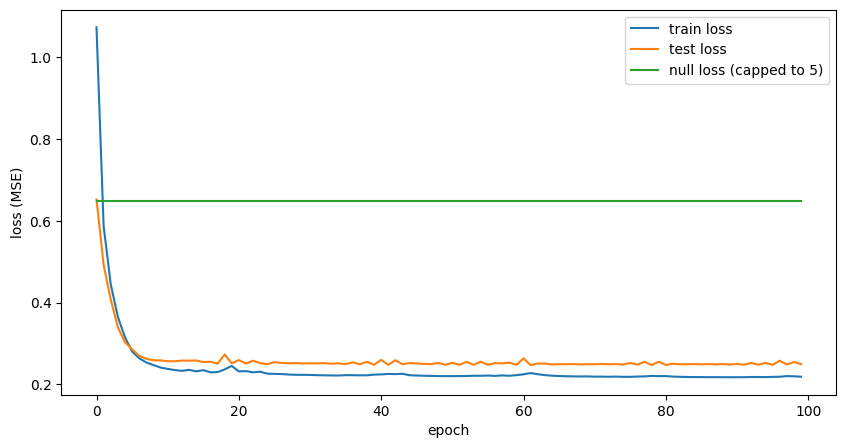

In [0]:
# plotting the losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
null_test_losses_cap = [min(x,5) for x in null_test_losses]
plt.plot(null_test_losses_cap, label='null loss (capped to 5)')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.show()

In [0]:
import torch_geometric
torch_geometric.seed_everything(3)

# pick one person at random which has positions
random_person = profiles_df.sample(n=1).iloc[0]
prev_positions = profiles_positions_df[profiles_positions_df['id'] == random_person['id']][['experience_index', 'position_embedding']].values.tolist()
cnt = 0
while (len(prev_positions) == 0) or (cnt > 0):
    random_person = profiles_df.sample(n=1).iloc[0]
    prev_positions = profiles_positions_df[profiles_positions_df['id'] == random_person['id']][['experience_index', 'position_embedding']].values.tolist()
    cnt -= 1

# printing the name of the person chosen
print(random_person['name'])

# encoding this random person as a graph
random_person_graph = build_graph(id=random_person['id'], name=random_person['name'], profiles_emb=profiles_df, profile_position_emb=profiles_positions_df)

# predicting the position embedding for this person
model.eval()
prediction = model(random_person_graph).detach().numpy()
print(prediction)

Khuong Phan
[ -8.769137    -0.89251053  -1.7205828  ... -80.39317    -46.31955
 -31.253756  ]


In [0]:
# showing the previous positions of this person
print(prev_positions)

[[0, array([-0.00936141, -0.38539505,  0.74821273, ...,  0.55145143,
        0.14727308, -0.17743349])], [1, array([-0.03338853, -0.45049854,  0.8344653 , ...,  0.4634122 ,
        0.1507088 , -0.51489085])], [2, array([ 0.13489034, -0.30606179,  0.80189463, ...,  0.52207743,
        0.06795142,  0.12649252])], [3, array([-0.12969388, -0.32529584,  1.14933614, ...,  0.56840535,
       -0.10457806, -0.08913929])], [4, array([ 0.25718124, -0.46098604,  0.87771709, ...,  0.04929828,
        0.17479653, -0.26028142])], [5, array([-0.17668901, -0.30727901,  0.54219759, ...,  0.41008685,
        0.0126485 , -0.12232121])], [6, array([-0.20387879, -0.36238557,  0.57987853, ...,  0.41678848,
        0.0611544 , -0.12874861])], [7, array([ 0.00603219, -0.33037997,  0.56235963, ...,  1.21102463,
        0.12925464,  0.07777754])], [8, array([ 0.23226782, -0.48500419,  1.17009239, ...,  0.56930156,
       -0.11693117,  0.06242192])], [9, array([ 0.17670376, -0.20685493,  0.82559956, ...,  0.26372

In [0]:
# finding this person in the original dataset
display(profiles_with_exp_details.filter(col("id") == random_person['id']))

id name pre_enc experience_index khuong-phan-15142523a Khuong Phan Radio Disc Jockey Fillmore, California, United States I thought I told you you can't scam me for work that I've done in life on my network my laptop my computer my love got nothing to do with you little girl horrible person I thought I told you you can't scam me for work that I've done in life on my network my laptop my computer my love got nothing to do with you little girl horrible person 0 khuong-phan-15142523a Khuong Phan Spy Washington, District of Columbia, United States I think the grandpa is in the house with the newspaper but the kid and the boy I don't k or the wife and uncle? What can't happen? Running into old pdte or piloce? I think the grandpa is in the house with the newspaper but the kid and the boy I don't k or the wife and uncle? What can't happen? Running into old pdte or piloce? 1 khuong-phan-15142523a Khuong Phan Boss Ho Chi Minh City, Ho Chi Minh City, Vietnam If you had any idea how walmart cared about him then why do keep putting in acts like if I knew then it's a good one but can we just have him work If you had any idea how walmart cared about him then why do keep putting in acts like if I knew then it's a good one but can we just have him work 2 khuong-phan-15142523a Khuong Phan Lieutenant Tully, Hauts-de-France, France Date me you fool your boobis better I thoughts so good ol m the Donna's be better wit em booboo Date me you fool your boobis better I thoughts so good ol m the Donna's be better wit em booboo 3 khuong-phan-15142523a Khuong Phan Dancer Biên Hòa, Dong Nai, Vietnam I went dancing for a wedding but the date was tired she needed rest I date raped her and ducked her bending her thighs and grabbing legs for better grasp of pussy I went dancing for a wedding but the date was tired she needed rest I date raped her and ducked her bending her thighs and grabbing legs for better grasp of pussy 4 khuong-phan-15142523a Khuong Phan Writer Missouri, United States Hi Pam can you shower with me one more time I think the bonus could be bought everytime or else imma have to go the base and take a shower at the company base Hi Pam can you shower with me one more time I think the bonus could be bought everytime or else imma have to go the base and take a shower at the company base 5 khuong-phan-15142523a Khuong Phan Senior Technical Writer Missouri, United States Hi Pam can you shower with me one more time I think the bonus could be bought everytime or else imma have to go the base and take a shower at the company base Hi Pam can you shower with me one more time I think the bonus could be bought everytime or else imma have to go the base and take a shower at the company base 6 khuong-phan-15142523a Khuong Phan Actor South San Jose Hills, California, United States San Jose State Iniversity can sick m u dick for some Crack u o u stupid ass nigga named Donald Trump or else I ma have to make header fu. Off the wack shot tho San Jose State Iniversity can sick m u dick for some Crack u o u stupid ass nigga named Donald Trump or else I ma have to make header fu. Off the wack shot tho 7 khuong-phan-15142523a Khuong Phan Entertainer San Bernardino County, California, United States The baby is hurs she was a little girl to be as a boy I know all kind of filthy pleasure that Christina did in that skirt to eat with the pizza is already served butch I fucked her that afternoon in my bedroom to the corner you all saw The baby is hurs she was a little girl to be as a boy I know all kind of filthy pleasure that Christina did in that skirt to eat with the pizza is already served butch I fucked her that afternoon in my bedroom to the corner you all saw 8 khuong-phan-15142523a Khuong Phan Disk Jockey New York City Metropolitan Area I'll make love to you til your body stops let's go slow I ain't got nowhere to left to go throw your clothes on the flow I'm gonna take my clothes off two entourage two I'll make love to you til your body stops let's go slow I ain'

In [0]:
from pyspark.sql.functions import col, lit, sqrt, array, expr

def mynorm(vec):
    return sqrt(expr(f"aggregate(transform({vec}, x -> x * x), 0D, (acc, x) -> acc + x)"))

def mydot(a, b):
    return expr(f"aggregate(transform(arrays_zip({a}, {b}), x -> x['embedding'] * x['prediction']), 0D, (acc, x) -> acc + x)")

def cos_sim_ps(a, b):
    return mydot(a, b) / (mynorm(a) * mynorm(b))

# Ensure prediction array is of the same type as embedding column
prediction = [float(x) for x in prediction]

custom_data_emb_pred = custom_data_emb_avg.withColumn('prediction', array([lit(x) for x in prediction]))

custom_data_emb_pred = custom_data_emb_pred.withColumn(
    "cosine_sim", 
    cos_sim_ps("embedding", "prediction")
)
display(custom_data_emb_pred.orderBy(col("cosine_sim").desc()).limit(10))
display(custom_data_emb_pred.orderBy(col("cosine_sim").asc()).limit(10))

company_name title location description embedding prediction cosine_sim Southwest Key Programs Change Management Coordinator Houston, TX Job Summary:: 

 The Change Management Coordinator will be responsible for developing and executing the change management plans in alignment with the organization's strategic goals and service objectives. This position will collaborate with key stakeholders to identify potential risks, develop mitigation strategies, and contribute to the development of a change management framework tailored to the unique needs of our organization. The Change Management Coordinator will create clear and compelling communication materials, including presentations, newsletters, and updates, to convey the benefits and goals of the changes and coordinate and deliver training sessions for staff to equip them with the necessary skills and knowledge to adapt to changes in services/workflow/structure. This position will report to the Director of PM & Process Improvement. Essential Functions:: Conduct regular assessments and evaluations to gather feedback from staff and stakeholders, using the insights to refine change strategies.Collaborate with cross-functional teams to ensure the successful implementation of change initiatives within specified timelines and budget constraints.Develop and implement key performance indicators (KPIs) to measure the success and impact of change initiatives.Develop and execute change management plans in alignment with the organization's strategic goals and service objectives.Collaborate with key stakeholders to identify potential risks and develop mitigation strategies.Contribute to the development of a change management framework tailored to the nonprofit sector and the unique needs of our organization.Establish and maintain effective communication channels to ensure all stakeholders are informed and engaged throughout the change process.Create clear and compelling communication materials, including presentations, newsletters, and updates, to convey the benefits and goals of the changes.Coordinate and deliver training sessions for staff to equip them with the necessary skills and knowledge to adapt to changes in services.Work closely with department heads to identify training needs and facilitate professional development opportunities.Monitor project milestones, identifying potential roadblocks, and proposing solutions to keep projects on track. Other Functions:: Proactively stay up to date on trends, within the employee development and education best practices industry.Assist with the development and administration of revenue generation activities, business development, and grant applications.Able to react to change productively and handle other essential tasks as assigned. Qualifications and Requirements:: Bachelor’s degree in business administration, organizational development, or a related field or six (6) years of experience in a related field.Proven experience in change management, preferably within the nonprofit sector.Strong communication and interpersonal skills with the ability to build positive relationships at all organizational levels.Project management experience and familiarity with change management methodologies.Available for frequent and extended travel as required.Bilingual (Spanish) - Preferred Physical Demands:: Must be able to read, write, and communicate both verbally and in written form to express and exchange ideas. While performing the responsibilities of this job, the employee must be able to access all components of the workstation and other office equipment. Frequent typing, writing, bending, and twisting. Must be able to lift up to 10 pounds. Work Environment:: General office environment with moderate noise. This position is mostly sedentary and involves sitting most of the time but may involve walking or standing for brief periods of time. A busy environment with many unscheduled interruptions. Frequent computer uses at workstations for extended periods of

company_name title location description embedding prediction cosine_sim null null null null null List(-8.769137382507324, -0.8925105333328247, -1.7205828428268433, -40.55927276611328, 55.5673828125, -62.575870513916016, -0.5520288944244385, -70.54182434082031, 100.96984100341797, 26.980453491210938, 93.01748657226562, 46.5496826171875, -19.775564193725586, -10.495465278625488, -59.74126434326172, 51.25486755371094, -69.91248321533203, -28.844362258911133, -51.5880126953125, 58.05470657348633, 9.64330768585205, 20.32570457458496, 57.75177764892578, 19.782367706298828, -59.86233139038086, 47.96379089355469, -20.281644821166992, -40.73332214355469, -43.904720306396484, -33.72676086425781, 58.791175842285156, 1.3208606243133545, 89.39791870117188, -16.952320098876953, -10.689613342285156, 50.267024993896484, 68.94426727294922, 44.128929138183594, -22.830598831176758, 0.5653902292251587, -81.07579040527344, -26.98894500732422, -3.5655837059020996, -23.767757415771484, -77.66860961914062, -14.561668395996094, 43.90360641479492, -29.17413330078125, 107.19383239746094, -35.02247619628906, 9.010871887207031, -57.120216369628906, 9.47206974029541, 37.27436828613281, -65.52737426757812, -27.776121139526367, -20.031461715698242, 20.129884719848633, 56.36897659301758, 27.051034927368164, -38.51270294189453, 40.97126770019531, 46.397544860839844, -22.098848342895508, 20.726940155029297, -40.139591217041016, 23.781509399414062, -38.94161605834961, -27.359710693359375, 8.268251419067383, 40.68632507324219, 15.980639457702637, 10.639175415039062, 16.89836311340332, -25.039058685302734, -4.026769161224365, 52.30657958984375, -60.027950286865234, -55.3358268737793, -6.351385593414307, -49.966651916503906, -20.682674407958984, 57.79953384399414, 68.6312255859375, -18.0753116607666, -28.9970645904541, -12.059212684631348, 11.513218879699707, -1.3866806030273438, 22.05811309814453, -58.12590026855469, 61.91221237182617, 4.264184951782227, 45.09058380126953, -5.719222068786621, 30.768579483032227, -70.1662826538086, -12.632136344909668, 22.896162033081055, 51.60443878173828, 2.2267773151397705, -32.93891143798828, 11.247425079345703, 73.4900894165039, -21.79666519165039, 61.5715446472168, 16.849262237548828, -17.83662223815918, 33.00532913208008, -28.952646255493164, -63.78652572631836, 21.79987144470215, -0.27416110038757324, -37.922855377197266, -56.56242370605469, -33.187591552734375, -18.401330947875977, 22.942472457885742, -41.0546875, -76.23062896728516, -60.02772521972656, 9.63615894317627, -7.858418941497803, -27.057653427124023, 25.110118865966797, 35.149139404296875, -6.416309833526611, -54.35591506958008, 29.88445281982422, -49.2800407409668, -1.7665752172470093, -25.70037078857422, -22.247303009033203, -16.121715545654297, -25.562580108642578, -4.973837375640869, 45.934974670410156, -27.591171264648438, 3.5445709228515625, -52.639896392822266, 90.09347534179688, -8.322375297546387, 39.293548583984375, 38.93692398071289, -45.16579055786133, 2.981856346130371, -1.0812575817108154, 37.442874908447266, -0.9988670349121094, 48.776512145996094, 16.75992202758789, 4.326719284057617, -48.30272674560547, -47.53034210205078, -61.23646545410156, 56.39840316772461, -38.5644416809082, -59.3444938659668, -46.64076614379883, 44.871315002441406, -106.60519409179688, -6.460407733917236, 5.4156670570373535, 10.640666961669922, 3.128993511199951, -8.970333099365234, 3.1054844856262207, -87.73635864257812, 24.03867530822754, -6.421547889709473, -3.2997639179229736, 52.314842224121094, -32.35837173461914, 44.74176025390625, -55.75547409057617, 3.0331850051879883, -32.6350212097168, 29.365293502807617, 7.288561820983887, 22.017776489257812, 39.326786041259766, -9.121843338012695, -50.11649703979492, -23.371334075927734, 6.677225112915039, 34.35395812988281, 4.712029457092285, 54.77927780151367, 68.58280181884766, -3.3147940635681152, 37.466732025146484, -1.2369863986968994, 25.64936637878418, -36.14728546142578, -36.1006965637207, 24.76549530029297, -3.922687

In [0]:
import torch_geometric
torch_geometric.seed_everything(3)

# pick one person at random which has positions
random_person = profiles_df.sample(n=1).iloc[0]
prev_positions = profiles_positions_df[profiles_positions_df['id'] == random_person['id']][['experience_index', 'position_embedding']].values.tolist()

cnt = 0
while (len(prev_positions) != 0) or (cnt > 0):
    random_person = profiles_df.sample(n=1).iloc[0]
    prev_positions = profiles_positions_df[profiles_positions_df['id'] == random_person['id']][['experience_index', 'position_embedding']].values.tolist()
    cnt -= 1

# printing the name of the person chosen
print(random_person['name'])

# encoding this random person as a graph
random_person_graph = build_graph(id=random_person['id'], name=random_person['name'], profiles_emb=profiles_df, profile_position_emb=profiles_positions_df)

# predicting the position embedding for this person
model.eval()
prediction = model(random_person_graph).detach().numpy()
print(prediction)

Kyle Scheich
[-3.8483646  -0.36327052 12.433909   ... 11.007012   12.456463
  4.819122  ]


In [0]:
# finding this person in the original dataset
display(profiles.filter(col("id") == random_person['id']))

about avatar certifications city country_code current_company current_company:company_id current_company:name education educations_details experience followers following groups id languages name people_also_viewed position posts recommendations recommendations_count timestamp url volunteer_experience сourses - More than 10 years of experience in JavaEE development, a solid foundation in JAVA, understanding of basic knowledge of IO, multithreading, reflection, security, etc., and a certain understanding of JVM principles and tuning; - Familiar with Spring, springMVC, Struts, Ibatis, hibernate, SOA service framework, etc., understand its principle and implementation mechanism, read the source code, and imitate its core; - Familiar with scripts jQuery, Extjs, web container tomcat, weblogic; - Familiar with SQL and database-based design and development, master database tuning such as Mysql and Oracle; - Familiar with mogonDB, redis construction and use; - Familiar with common commands of Linux operating system; - Familiar with SVN, GIT, Maven, ANT and other build tools - Understand Hadoop, zookeeper and other open source distributed systems, and MapReduce programming. - Familiar with various data structures and algorithm models - Be good at learning and communicating with others, be upright and honest, have a strong sense of professionalism, and have the ability to analyze and solve application problems; - Experience in designing and developing large-scale e-commerce websites and core banking systems https://media.licdn.com/dms/image/D4D03AQH2eYCU8H0HbQ/profile-displayphoto-shrink_800_800/0/1687365489672?e=2147483647&v=beta&t=9Xj7AoKjIrc2TPMT1lM5Dy7oLIeo6VBsuWQM3sUZfqI List() Los Angeles, California, United States US List(null, null, null, null, Technical Adviser) null null List(List(Master's degree, 2009, Computer Software Engineering, 2007 - 2009 Activities and Societies: Freshman Scholarsh It is a private research university located in New Haven, Connecticut, USA. It is one of the twelve founding schools and QuestBridge members of the Association of American Universities, and a member of the NCAA Sports League Ivy League. The school was originally established on October 9, 1701 under the name of "University College" and is the third oldest institution of higher learning in the United States. In order to thank Elihu Yale (President of the British East India Company) for his… Show more It is a private research university located in New Haven, Connecticut, USA. It is one of the twelve founding schools and QuestBridge members of the Association of American Universities, and a member of the NCAA Sports League Ivy League. The school was originally established on October 9, 1701 under the name of "University College" and is the third oldest institution of higher learning in the United States. In order to thank Elihu Yale (President of the British East India Company) for his donation, the school changed its name to "Yale College" in 1718. The college was originally designed to train theology and canonical linguistics talents for the Congregational Church, and since 1777, it has added humanities and science education courses. During the 19th century, the school added a number of graduate and professional colleges, and in 1861 awarded the first doctorate in the United States. In 1886, Yale officially operated in the mode of operation of a modern university. Show less, 2007, Yale University, https://www.linkedin.com/school/yale-university/?trk=public_profile_school_profile-section-card_image-click)) Yale University List(List(null, null, Forging the path for integrated vulnerability management across the enterprise. Working to implement a pro-active, standardized approach for monitoring and managing enterprise vulnerabilities for desktops, mobiles, servers and applications utilizing current tool sets and centralized ticket management. Working across our internal Information Management (IT) organizations (including Cyber Security, Software 

In [0]:
from pyspark.sql.functions import col, lit, sqrt, array, expr

def mynorm(vec):
    return sqrt(expr(f"aggregate(transform({vec}, x -> x * x), 0D, (acc, x) -> acc + x)"))

def mydot(a, b):
    return expr(f"aggregate(transform(arrays_zip({a}, {b}), x -> x['embedding'] * x['prediction']), 0D, (acc, x) -> acc + x)")

def cos_sim_ps(a, b):
    return mydot(a, b) / (mynorm(a) * mynorm(b))

# Ensure prediction array is of the same type as embedding column
prediction = [float(x) for x in prediction]

custom_data_emb_pred = custom_data_emb_avg.withColumn('prediction', array([lit(x) for x in prediction]))

custom_data_emb_pred = custom_data_emb_pred.withColumn(
    "cosine_sim", 
    cos_sim_ps("embedding", "prediction")
)
display(custom_data_emb_pred.orderBy(col("cosine_sim").desc()).limit(10))
display(custom_data_emb_pred.orderBy(col("cosine_sim").asc()).limit(10))

company_name title location description embedding prediction cosine_sim Verizon Media Product Manager - Data Science New Jersey Position: Technical Process/Product Manager with Data Science Location: Basking Ridge, NJ Employment: Contract Client: Verizon List(-0.2646475002683442, -0.37520055832534, 1.784763465667593, 0.8089942184501681, 0.12083538480359933, 0.03138020865876099, -0.29659394791413995, 0.011114392044215366, -0.7160780968080307, -0.12299276775969513, -0.21317243980693407, 0.5562032170850655, -0.08210323494056175, 0.06255074513369593, -0.14721399622744527, -0.7154834332137272, 0.27976347120671435, 0.5553305133663374, -0.01679148826876591, -0.41573741261301367, -0.41019838855698193, 0.7512606094623434, -0.21111475239539967, 0.20394142280364858, 0.7706158854838076, -0.5507009381364132, 0.560075636310824, -0.3228261553007981, 1.3533814097272938, -0.15388405528561822, -0.18691123315486416, 0.368049160416784, -0.06450071648277085, 0.27887363474944543, -0.0052627471500429615, 0.7179344065230469, -1.2716566427000637, -0.25759560717590924, 0.671232403866176, -0.44782929430747853, 0.5029112563051027, 0.24959609965825902, 0.9131005049265665, 1.1356242710146411, 0.6700363220839665, -0.013557982598913127, -1.7785374730311592, -0.5994111602676326, 0.5151611258243692, -0.47165362023074053, 0.2512510232627392, -0.8364081156664881, -0.007826767990301395, 0.17967039744915633, 0.8486913331495277, 0.10928225735652036, 0.05646835832760252, 0.52990515709951, 0.13058085887339607, -0.6626531836287729, 1.0625540573021461, -1.5099759954830696, -0.1431791595472344, -0.5305837639446916, 0.6539407557454603, 0.3028301985227856, 0.04913109717569474, 0.33900698736823837, 0.18066004888507828, -1.0444779683803689, -0.09504354006514468, -0.9938873730856796, -0.2728289360790674, -0.3395160891372582, 0.4570171370267354, 0.41687387215166255, -0.952501186009111, 0.6212818401640859, 0.6647543700347687, -0.32677008879595787, 0.39496126231448403, -0.4951943298480634, -0.007736237013134463, -0.677133733181861, 0.34120480459311914, -0.29466742033074644, 0.2040850493157732, 0.3679865124346367, 0.2378118300232394, 0.40926972956492985, 0.0024441470359933787, -0.11879061335890458, 1.129528752688704, 0.3242247302470536, -0.7086339479890363, -1.6819181483367394, -0.5350353368397417, 0.5594315151202267, -0.2668579708913277, 0.622654429540552, -0.8961220029099234, -0.5623632867274613, 0.5577091733957159, -0.31776054948568344, -0.5334859510947918, -0.6268871092590792, -0.3187220029789826, 0.2650699623828304, 0.2112959679858438, -0.42727884136397265, 0.23566783296650853, -1.074572056018073, -0.8700885554325992, 0.5663050806214069, 0.3081032769304925, -0.05499517121191683, -0.06813381612300873, -0.763089521691717, -0.10252748558233524, 0.8255196020874227, 0.1579931154847145, -0.34695803309822904, -0.297130526396735, -0.002992802813392261, -1.00774537489332, 0.30549458510659894, -0.16545236786297554, -0.38332551024083433, 0.2991539788400305, 1.1527982608511531, -0.5915186194510296, -0.9178648945586435, 0.5521723977450667, 0.02913697873210085, 0.5531777462054943, 0.38081614184996176, -1.5161819599311928, 0.14701171591877937, -0.18230358177217945, 0.43830734851031466, -0.27133662215080756, -0.19246604550501395, 0.3489075531733447, -0.43956987405645437, -1.1399457778396278, 0.29159845270473383, 0.28392712155292776, 0.24405635989688593, 0.3846400774501521, -0.2548895672541754, 0.18659635774534325, 0.1981793255384626, 0.3267794408161065, 0.6912970454271498, 0.6615454474913662, -1.417182129004906, -0.010688091146534887, -0.7155987317192143, 0.07774940171632273, -0.43158359555848713, 0.6474305309098343, -0.03890483646557249, -0.5505517248449654, 0.0944598152719695, -0.16157020487148185, -0.20795846878197685, 0.6508701250984751, -0.19464265221151814, 0.08286727322586651, -0.2988119851155528, -0.5472692443892874, -0.690526890504206, 1.1810299687344452, -0.7178888815487253, 0.4785078661195163, -0.34831527402174883, 0.04534854707789832, -0.8972703948103148, -0.0836566227391876, -

company_name title location description embedding prediction cosine_sim null null null null null List(-3.8483645915985107, -0.36327052116394043, 12.43390941619873, 1.4049980640411377, -3.8330161571502686, -0.6016222238540649, -4.148188591003418, 0.5396826267242432, -14.361381530761719, 2.9350297451019287, -1.7176240682601929, 8.647662162780762, -2.073129415512085, 13.012673377990723, -0.3268563747406006, -2.1542882919311523, 4.6990766525268555, 5.640098571777344, -2.68544864654541, -7.6670613288879395, -4.216363906860352, 2.007760763168335, -0.35143935680389404, -0.22309517860412598, 6.116730213165283, -7.069022178649902, 1.8645460605621338, -1.5185472965240479, 18.1919002532959, -0.9601888656616211, 4.154042720794678, -4.416153907775879, -2.6162447929382324, 0.919251561164856, 0.9697380065917969, -0.4562281370162964, -15.807273864746094, 5.420830249786377, 6.543075084686279, -11.262131690979004, 7.911993503570557, -3.727790594100952, 11.58971881866455, 5.634993553161621, 0.21887481212615967, 1.9275975227355957, -8.90721607208252, -6.025374889373779, 7.657172679901123, -4.826324939727783, 8.96416187286377, -6.808771133422852, -1.309338092803955, -0.3360513746738434, 5.821774959564209, 1.443976640701294, -4.243563175201416, 0.17378121614456177, -6.1563401222229, -2.2094061374664307, 15.391283988952637, -8.112202644348145, 2.0350747108459473, -0.5685420036315918, 2.544250965118408, -5.606766223907471, -4.440933704376221, 0.6205691695213318, 9.311599731445312, -4.594511985778809, 4.512969970703125, -3.0538034439086914, 2.011615753173828, -10.182562828063965, 1.82130765914917, 8.41938591003418, -8.109665870666504, 4.222532272338867, 5.804809093475342, -3.3921396732330322, -0.24028615653514862, 3.7150516510009766, -0.4852861166000366, -10.746806144714355, -0.20215778052806854, -6.642906188964844, 4.715456485748291, 11.391737937927246, 2.782611131668091, 10.041726112365723, 3.4381680488586426, 0.2875543236732483, 10.533162117004395, 2.018386125564575, -7.087183952331543, -13.757547378540039, -1.8347201347351074, 4.576416015625, 0.0536089725792408, 1.0697848796844482, -3.6493678092956543, -2.495558977127075, 6.354220390319824, -2.8471720218658447, 1.5895625352859497, -11.608389854431152, -2.284444570541382, 6.860091686248779, -0.9260076284408569, 4.871107578277588, 0.048870161175727844, -9.027547836303711, -12.175495147705078, 0.7703641057014465, 5.788366317749023, 1.037221074104309, 0.7802821397781372, 1.39578378200531, -5.028823375701904, 6.483993053436279, 0.6584256887435913, 3.0348525047302246, 5.865527153015137, -2.6310110092163086, -4.037400245666504, 3.2268714904785156, -4.037695407867432, -6.67901086807251, 2.0338034629821777, 4.650284290313721, -3.651123285293579, -6.873603820800781, 5.296439170837402, 0.25339528918266296, 5.972740650177002, 7.086405277252197, -13.35511589050293, 9.364112854003906, -5.401122093200684, -5.781476974487305, 3.622195243835449, -6.002815246582031, 3.0828967094421387, -9.223734855651855, 0.8417511582374573, 4.882918357849121, 2.572268009185791, -7.508091449737549, -0.7038828134536743, -3.6040005683898926, 0.310594379901886, -2.885725975036621, 6.75768518447876, -0.9036827683448792, 7.164221286773682, -6.572192668914795, 0.21570922434329987, -1.0331557989120483, -4.3362531661987305, -10.077059745788574, 6.426292896270752, 0.8772734999656677, -4.24043607711792, 4.98051643371582, 0.7386140823364258, -14.487297058105469, 0.27965041995048523, 1.9672846794128418, 1.8439644575119019, -3.36677885055542, -6.905718803405762, -3.636188507080078, 7.74813175201416, -0.5471014380455017, -2.5436878204345703, -1.176234245300293, 1.383802890777588, -3.794489622116089, -1.3028109073638916, -8.552247047424316, -7.103493690490723, 5.701662063598633, 6.826281547546387, 1.638715386390686, -4.964393615722656, 0.4786258339881897, 2.710141897201538, -9.823630332946777, -21.999759674072266, 2.1250264644622803, -4.601114749908447, -3.173671245574951, 3.9466466903686523, -5.3968825340271, 5.293460845947266, -7.30297517776489

## Finding companies to scrape

In [0]:
from pyspark.sql.functions import explode, col

exploded_profiles = profiles.withColumn("experience", explode("experience")) \
                            .withColumn("former_comp", col("experience.company"))

In [0]:
filtered_profiles = exploded_profiles.filter(col("former_comp").isNotNull())
# display(filtered_profiles.limit(10))

In [0]:
from pyspark.sql.functions import count

grouped_profiles = filtered_profiles.groupBy("former_comp").agg(count("former_comp").alias("count")) \
                                    .orderBy(col("count").desc()).withColumnRenamed("former_comp", "company")

In [0]:
from pyspark.sql.functions import lower, col

company_names = companies.select(lower(col("name")).alias("name"))

filtered_grouped_profiles = grouped_profiles.withColumn("company_low", lower(col("company"))) \
                                            .join(company_names, col("company_low") == col("name"), "inner") \
                                            .dropDuplicates(["company_low"]) \
                                            .drop("company_low") \
                                            .drop("name") \
                                            .orderBy(col("count").desc())

In [0]:
display(filtered_grouped_profiles.limit(1000))

company count Amazon 1647 Freelance 636 Kaiser Permanente 562 U.S. Bank 332 University of Wisconsin-Madison 244 Northwestern Mutual 200 Self-Employed 190 Genentech 175 Florida State University 165 Virginia Tech 153 State Farm 148 Duke Energy Corporation 135 University of South Florida 131 HCA Healthcare 130 Whirlpool Corporation 127 Oklahoma State University 125 University of North Texas 117 University of Connecticut 111 BD 103 The Kraft Heinz Company 100 Texas State University 99 NASA - National Aeronautics and Space Administration 98 University of North Carolina at Charlotte 96 University of Nebraska-Lincoln 94 Georgia Institute of Technology 91 The George Washington University 88 Rockwell Collins 83 Tufts University 81 T. Rowe Price 80 Louisiana State University 77 University of Chicago 77 Baylor University 73 iHeartMedia 73 National Park Service 73 University of Louisville 72 Epic 72 EMC 70 Kohler Co. 70 American Electric Power 67 Loyola Marymount University 65 Retired 64 Stanford University School of Medicine 64 University of Dayton 63 The Ohio State University Wexner Medical Center 63 Liberty University 62 Scripps Health 62 Baylor College of Medicine 62 Rensselaer Polytechnic Institute 61 Life Time Inc. 60 BAE Systems, Inc. 60 Federal Bureau of Investigation (FBI) 59 Starwood Hotels & Resorts Worldwide, Inc. 59 Michigan Technological University 58 Continental 57 ScribeAmerica 56 Total Quality Logistics 56 Coldwell Banker Residential Brokerage 55 NewYork-Presbyterian Hospital 51 Alpha Phi International Fraternity 50 Keurig Dr Pepper Inc. 49 Grand Valley State University 48 Dana-Farber Cancer Institute 48 St. Luke's University Health Network 48 Success Academy Charter Schools 46 The University of Texas at El Paso 45 Wake Forest University 45 Amtrak 44 Equinox 44 Azusa Pacific University 44 Abercrombie & Fitch Co. 42 WellSpan Health 41 MITRE 41 Oxy 40 Arvest Bank 40 University of North Florida 40 N/A 39 City National Bank 39 Citizens 38 Blue Cross Blue Shield of Michigan 38 Compass 38 Harris Teeter 38 Miami Dade College 38 Alight Solutions 37 Flex 36 UMass Memorial Medical Center 36 Florida Hospital 36 Boy Scouts of America 35 Fordham University 35 Eastern Michigan University 34 Breakthru Beverage Group 34 ICF 34 Pacific Lutheran University 34 Better 33 First Citizens Bank 33 University of Nebraska at Omaha 33 Weber Shandwick 33 Samsung Electronics America 32 NRG Energy 32 Guidehouse 32 Zeta Tau Alpha Fraternity 31 Confidential 31 NASA Goddard Space Flight Center 31 RTI International 31 The Scotts Miracle-Gro Company 31 GSA 30 Public Consulting Group 30 Armstrong World Industries 29 Banana Republic 29 Idaho State University 29 Personal Projects 28 Change Healthcare 28 Stephen F. Austin State University 28 Duquesne University 28 Wake County Public School System 28 L.L.Bean 28 Publix Pharmacy 28 Chevron Phillips Chemical Company 27 Crowe 27 MAC Cosmetics 27 Oak Ridge National Laboratory 27 Corteva Agriscience 27 Hobart and William Smith Colleges 26 Truman State University 26 Alpha Kappa Psi 26 Samaritan Health Services 25 Follett Higher Education 25 Tufts Medical Center 25 Magellan Health 25 Alpha Chi Omega Fraternity, Inc. 24 Coca-Cola Consolidated 24 Encore 24 Baldwin Wallace University 24 Salt River Project 24 Swagelok 24 The Aerospace Corporation 24 American Tower 24 U.S. Department of Energy (DOE) 24 Express Employment Professionals 24 jcpenney 24 U.S. Navy Reserve 24 Constellation 23 California State University-San Bernardino 23 Eddie Bauer 23 Eastern Washington University 23 AMC Networks 23 Toast 23 Hospital for Special Surgery 22 Blackstone 22 Hannaford Supermarkets 22 Eastman Kodak Company 22 Various Companies 22 Michaels Stores 21 Dean Foods 21 Nabors Industries 21 The New School 21 Upstart 21 Umpqua Bank 21 Regal 21 Scholastic 21 The College Board 21 Achievement First 20 Barnes & Noble College 20 ViacomCBS 20 Carolinas Healthcare System 20 General Atomics 20 Men's Wearhouse 20 Triad 20 West Chester University of Pe